<h2>Assignment 1 - Linear Regression on Diabetes Dataset</h2>

# Project 1 by: Alexander Sanna
Due 10/12/2023

In [1]:
# The modules we're going to use
from __future__ import print_function
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn import datasets, linear_model
from scipy import linalg
import numpy as np
import matplotlib.pyplot as plt
import torch
#import pandas as pd

# When you execute a code to plot with a simple SHIFT-ENTER, the plot will be shown directly under the code cell
%matplotlib inline

# Reference: http://www4.stat.ncsu.edu/~boos/var.select/diabetes.html
# Load data from scikit-learn
diabetes = datasets.load_diabetes()
data = diabetes.data
target = diabetes.target




<h4>Task  1: Prepare the 3 datasets</h4>

In [2]:
# please implement your code for task 1 here
# 60 train, 20 valid, 20 exam

print("Data Samples: ", data.size)
print("Target Samples: ", target.size)
#results confirm 10 attributes from each sample


train_data, valid_data, train_target, valid_target = train_test_split(data, (target [:, np.newaxis]), test_size = .2, random_state = 20)
train_data, test_data, train_target, test_target = train_test_split(train_data, train_target, test_size = .25, random_state = 20)

print("train set: ",train_data.shape)
print("valid set: ",valid_data.shape)
print("test set:", test_data.shape)

print("train target size: ", train_target.shape, "valid target size: ", valid_target.shape, "test target size: ", test_target.shape)

'''
  Numbers look good according to output. we have effectively split the original data set into 3 categories.   
  the train set is for the model to study. 
   the validation set is to quiz our model and optimize based on results. 
   the test set is to examine after were done. 
'''







Data Samples:  4420
Target Samples:  442
train set:  (264, 10)
valid set:  (89, 10)
test set: (89, 10)
train target size:  (264, 1) valid target size:  (89, 1) test target size:  (89, 1)


'\n  Numbers look good according to output. we have effectively split the original data set into 3 categories.   \n  the train set is for the model to study. \n   the validation set is to quiz our model and optimize based on results. \n   the test set is to examine after were done. \n'

<h4>Task 2: Use linear regression from scikit-learn in the following cell, for comparsion of results with basic gradient method and stochastic gradient descent method</h4>

Note: linear regression from scikit-learn uses the closed-form solution of the optimal solution.

In [3]:
# please implement your code for task 2 here
# call the linear reg class
# print the weights&bias and the errors. 
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as mpl
from sklearn.metrics import mean_squared_error


lg = LinearRegression()
lg.fit(train_data, train_target)
print( "weights: ", lg.coef_)
print("bias: ", lg.intercept_, "\n")
w = lg.coef_

print ("training loss using CS4210-style - MSE: %.2f" % (np.mean((lg.predict(train_data) - train_target) ** 2)/2))
print ("validation loss using C54210-style - MSE: %.2f" % (np.mean((lg.predict (valid_data) - valid_target) ** 2)/2))
print("testing loss using C54210-style - MSE: %.2f" % (np.mean((lg.predict (test_data) - test_target)** 2)/2))






'''
   Here we have a baseline of comparison going forward. These are loss values after no optimization. 
'''



weights:  [[-103.25162772 -167.14585841  594.74026799  314.69242767 -751.40512952
   546.04042414   20.06642566   68.34440414  788.44309299  -12.11014996]]
bias:  [153.45061061] 

training loss using CS4210-style - MSE: 1353.47
validation loss using C54210-style - MSE: 1747.66
testing loss using C54210-style - MSE: 1474.14


'\n   Here we have a baseline of comparison going forward. These are loss values after no optimization. \n'

<h4> Task 3: Use basic gradient descent to perform linear regression in the following cell</h4>

Note: Basic gradient descent method computes the gradient using whole training data examples in each iteration.

intercept:  [155.14859614]
weights: 
 [[ -4.68455935]
 [ -7.89302965]
 [ 28.61435051]
 [ 14.92739914]
 [ -2.69215673]
 [ -2.12574268]
 [-10.98730437]
 [  2.93356592]
 [ 24.36112028]]
training loss:  1363.3277836896357
valid loss:  1718.4937305133515
test loss:  1512.3367249803232



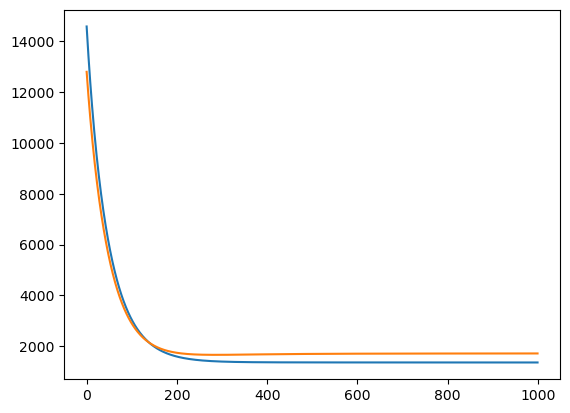

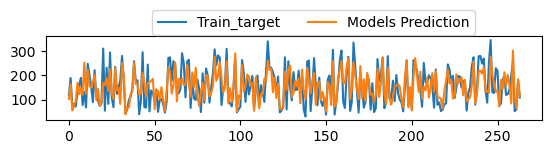

In [4]:
# you may use the following hyperparameters and experiment with various values for them
learning_rate = .01   # learning rate
numItrs = 1000   # number of iterations

from sklearn import preprocessing
scaler = preprocessing.StandardScaler().fit(train_data)
train_data = scaler.transform(train_data)
valid_data = scaler.transform(valid_data)
test_data = scaler.transform(test_data)


train_data_intercept = np.insert(train_data, 0, 1, axis = 1)
valid_data_intercept = np.insert(valid_data, 0, 1, axis = 1)
test_data_intercept = np.insert(test_data, 0, 1, axis = 1)




def myModelFunction(X, w):
    return np.dot(X,w)
def myLossFunction(X, w, y):
    return np.mean((myModelFunction(X,w) - y) **2)/2
def trainingLoop(train_data, valid_data, train_target, valid_target):
    train_loss_tracker = np.zeros((numItrs,1))
    valid_loss_tracker = np.zeros((numItrs,1))
   
    w = np.random.normal(0,1,(train_data.shape[1],1))
    
    for i in range(numItrs):
        Xw = np.dot(train_data, w)
        grad  = -1 * np.dot(train_data.T,(train_target-Xw))/(train_data.shape[0])
        
        w = w + learning_rate*(-1*grad)
        # print(w[1])
        train_loss_tracker[i] = myLossFunction(train_data, w, train_target)
        valid_loss_tracker[i] = myLossFunction(valid_data, w, valid_target)
       
    
    return w, train_loss_tracker, valid_loss_tracker

w, trainLoss, validLoss = trainingLoop(train_data_intercept, valid_data_intercept, train_target, valid_target)
print("intercept: ", w[0])
print("weights: \n", w[1:10])
print("training loss: ", myLossFunction(train_data_intercept, w, train_target))
print("valid loss: ", myLossFunction(valid_data_intercept, w, valid_target))
print("test loss: ", myLossFunction(test_data_intercept, w, test_target))

plt.plot(np.arange(numItrs), trainLoss, label = "Training error")
plt.plot(np.arange(numItrs), validLoss, label = "Validation error")


fig = plt.figure()
fig.subplots_adjust(hspace=.7)

plt.subplot(3,1,1)
plt.plot(np.arange(train_target.shape[0]),train_target, label = "Train_target")
plt.plot(np.arange(train_target.shape[0]),myModelFunction(train_data_intercept,w), label = "Models Prediction")
plt.legend(bbox_to_anchor = (0.2, 0.93), ncol = 2)
print()







# please implement your code for task 3 here

<h4> Task 4: Use stochastic gradient descent to perform linear regression in the following cell</h4>

Note:
* Stochastic gradient descent method computes the gradient using only a small **batch** of data examples in each iteration.
* Difference between iterations and epochs
> One **iteration** entails the processing of one batch of data, while one epoch entails the processing of the whole training data.




intercept:  [155.0935979]
weights: 
 [[ -3.94924281]
 [ -7.39490165]
 [ 29.09577712]
 [ 14.45825553]
 [ -2.25707793]
 [ -3.50909609]
 [-10.45558317]
 [  3.44623575]
 [ 24.89104824]]
training loss:  1364.6905594142822
valid loss:  1710.7056041941105
test loss:  1516.0439027191674



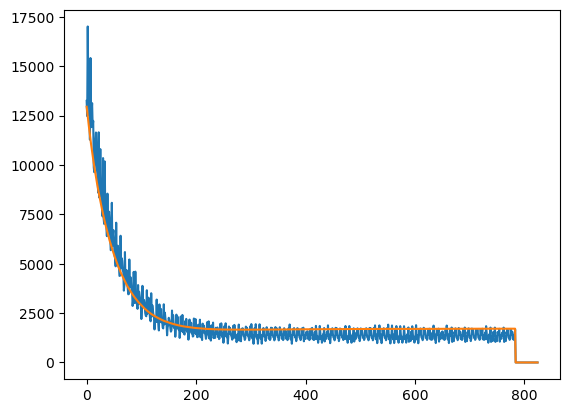

In [5]:
# you may use the following hyperparameters and experiment with various values for them
import random
learning_rate = 0.01   # learning rate
batch_size = 32 # number of data samples in a batch
epochs = 100   # number of epochs

# please implement your code for task 4 here

def myStochasticTrainingLoop(train_data, train_target, valid_data, valid_target, epochs, batch_size):
    totDataPoints = int( epochs * (train_data.shape[0] / batch_size))
    train_loss_tracker = np.zeros(((totDataPoints),1))
    valid_loss_tracker = np.zeros(((totDataPoints),1))
    w = np.random.normal(0,1,(train_data.shape[1],1))
    j = 0
    x = 2
    counter = 0
    for i in range(epochs):
        while j <= train_data.shape[0]:
            #print(train_data.shape[0])
            if(j + batch_size <= train_data.shape[0]):
                
                Xw = np.dot(train_data[j:(j+batch_size)], w)
                
                grad  = -1 * np.dot(train_data[j:(j+batch_size)].T,(train_target[j:j+batch_size]-Xw))/batch_size
                w = w + learning_rate*(-1*grad)
                #print("\t", j)
                
                train_loss_tracker[counter] = myLossFunction(train_data[j:(j+batch_size)], w, train_target[j:(j+batch_size)])
                valid_loss_tracker[counter] = myLossFunction(valid_data, w, valid_target)
                counter +=1
            j = j + batch_size
        #print(i)
        x = random.randint(0,10)
        j = x 
        i+=1

       
    
    return w, train_loss_tracker, valid_loss_tracker

w, trainTrack, validTrack = myStochasticTrainingLoop(train_data_intercept, train_target, valid_data_intercept, valid_target, epochs, batch_size)
#print(len(trainTrack))
print("intercept: ", w[0])
print("weights: \n", w[1:10])
print("training loss: ", myLossFunction(train_data_intercept, w, train_target))
print("valid loss: ", myLossFunction(valid_data_intercept, w, valid_target))
print("test loss: ", myLossFunction(test_data_intercept, w, test_target))
totDataPoints = int( epochs * (train_data.shape[0] / batch_size))
#print(trainTrack)
plt.plot(np.arange(totDataPoints), trainTrack, label = "Training error")
plt.plot(np.arange(totDataPoints), validTrack, label = "Validation error")
print()



In [8]:
import torch 

torch.cuda.device_count()

0